Simulation running using mode 1d. Axis order = [0 1 2].


(-2.5, 4)

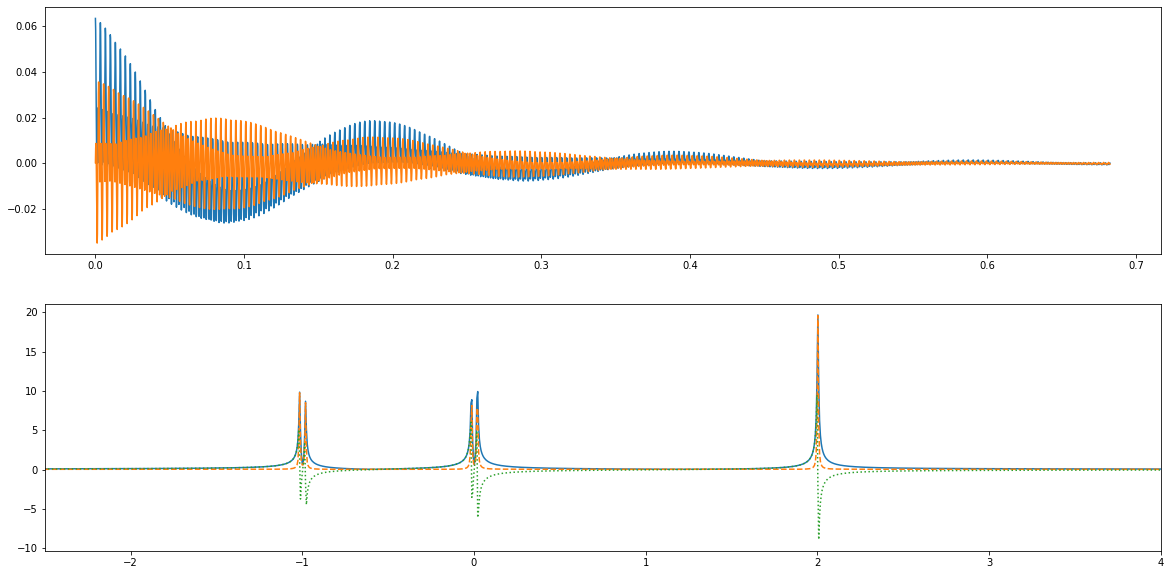

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import denmatsim.simseq as sim
from matplotlib import pyplot as plt
import numpy as np
import json

# Read json sequence file
jsonFile = '../example.json'

with open(jsonFile,'r') as jsonFile:
    jsonString = jsonFile.read()
    params = json.loads(jsonString)
    
description = params['description']# For use writing file        

# Define a simple spin system - 3 peaks, 2 coupled.
spinsys = {'shifts':np.array([0,2, -1],dtype=float),'j':np.array([[0,0,10],[0,0,0],[10,0,0]])}

# Run the simulation
FID,ax = sim.simseq(spinsys,params)

# Plot the results
fig, (ax1, ax2)= plt.subplots(2,1,figsize=(20, 10))
ax1.plot(ax['time'],np.real(FID))
ax1.plot(ax['time'],np.imag(FID))
spec = np.fft.fftshift(np.fft.fft(FID))

ax2.plot(ax['ppm'],np.abs(spec))
ax2.plot(ax['ppm'],np.real(spec),'--')
ax2.plot(ax['ppm'],np.imag(spec),':')
ax2.set_xlim([-2.5,4])